In [34]:
import matplotlib.pyplot as plt
import numpy as np
import os
import nibabel as nib

PATH = "/home/mariopasc/Python/Datasets/Meningiomas/meningioma"
PATIENT = "P1"
PULSES = ["T1", "T2", "SUSC"]

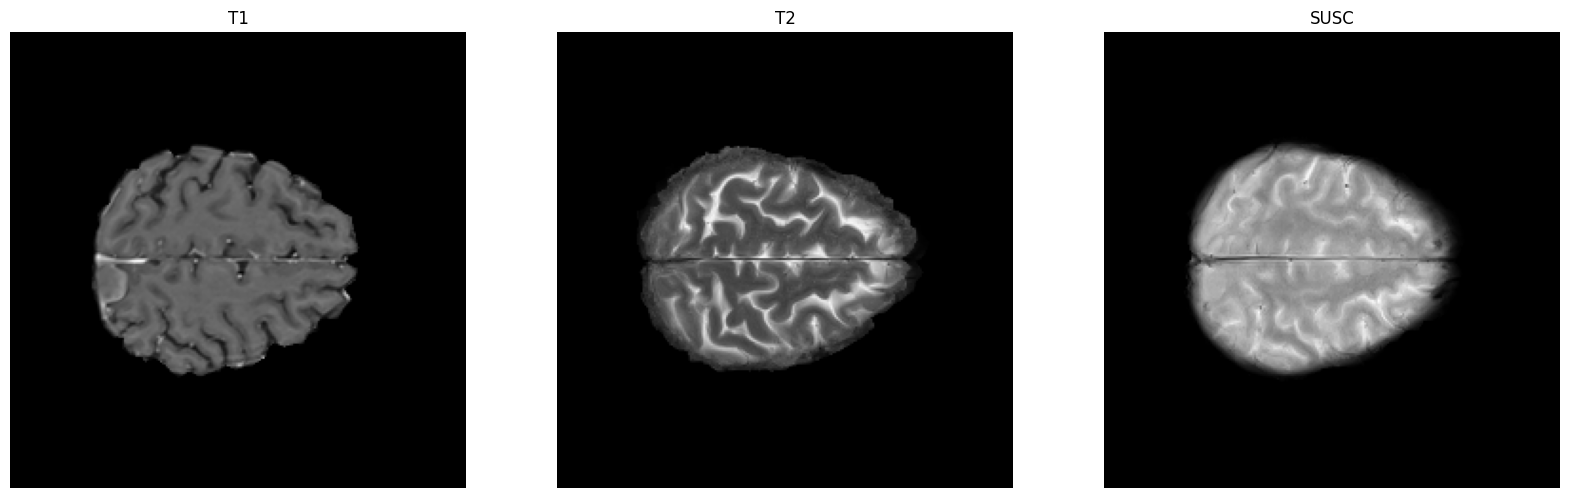

(240, 240, 155)
(240, 240, 155)
(240, 240, 155)


In [ ]:
suf = "_registered_sri24"

data = {}
for pulse in PULSES:
    file = os.path.join(PATH, PATIENT, f"{pulse}_1"+suf+".nii.gz")
    seg = os.path.join(PATH, PATIENT, f"{pulse}_1_mask_"+suf+".nii.gz")
    img = nib.load(file)
    data[pulse] = {
        "vol": img.get_fdata(),
        "seg": seg.get_data(),
    }

slice = 110
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
for i, pulse in enumerate(PULSES):
    ax[i].imshow(data[pulse]["vol"][:, :, slice], cmap="gray")
    ax[i].imshow(np.ma.where(data[pulse]["seg"][:, :, slice] == 1, 1, np.nan), cmap="Reds_r", alpha=0.5)
    ax[i].set_title(pulse)
    ax[i].axis("off")

plt.show()

print(data["T1"]["vol"].shape)
print(data["T2"]["vol"].shape)
print(data["SUSC"]["vol"].shape)



In [ ]:
slice = 100
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
for i, pulse in enumerate(PULSES):
    if pulse == "T1":
        slice = 100
    elif pulse == "T2":
        slice = 95
    elif pulse == "SUSC":
        slice = 105
    ax[i].imshow(data[pulse]["vol"][:, :, slice], cmap="gray")
    ax[i].imshow(np.ma.where(data[pulse]["seg"][:, :, slice] == 1, 1, np.nan), cmap="Reds_r", alpha=0.5)
    ax[i].set_title(pulse)
    ax[i].axis("off")

plt.show()
